# Analysis of Prepaid Telephone Packages

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid packages, Surf and Ultimate. The advertising department wants to know which prepaid plan generates more revenue to adjust the advertising budget.

You will do an initial analysis of these prepaid plans based on a relatively small sample of clients. You will have data on 500 Megaline clients: who they are, where they are from, what type of plan they use, and the number of calls and messages they sent in 2018. Your task is to analyze client behavior and determine which prepaid plans bring in more income.

**Prepaid Package Description**

Note: Megaline rounds seconds to minutes, and megabytes rounds to gigabytes. For calls, each individual call is rounded up: even if the call lasts only one second, it will count as one minute. For web traffic, each web session is not rounded up. However, the total for the month is rounded up. If a user spends 1025 megabytes this month, he will be charged for 2 gigabytes.

**Surf**

1. Monthly fee: \$20
2. 500 minutes of call duration per month, 50 SMS, and 15 GB of data
3. After exceeding the package limit, will be charged:
     - 1 minute: 3 cents
     - 1 SMS: 3 cents
     - 1GB of data: \$10

**Ultimate**

1. Monthly fee: \$70
2. 3000 minutes of call duration per month, 1000 SMS, and 30 GB of data
3. After exceeding the package limit, will be charged:
     - 1 minute: 1 cent
     - 1 SMS: 1 cent
     - 1GB of data: \$7

<b>Questions:</b>

   1. Which prepaid plans bring in more revenue?

<b>Hipotesis:</b>

   1. The average income of users of 'Surf' and 'Ultimate' phone plans is different.
   2. The average income of users in the NY-NJ area is different from the income of users from other regions.
   
<b>Stages:</b><a id='back'></a>

1. [Data Overview](#Start)
    - [Check each dataset](#check)
2. [Data Pre-processing](#Pre-processing)
    - [calls dataset](#calls)
    - [internet dataset](#internet)
    - [messages dataset](#messages)
    - [plans dataset](#plans)
    - [users dataset](#users)
    - [Prepare data](#prepare)
3. [*Exploratory Data Analysis*](#EDA)
    - [Users of 'Surf' and 'Ultimate' packages](#package)
4. [Hypothesis Test](#Test)
    - [Average revenue of 'Surf' and 'Ultimate' phone plan users](#h1)
    - [Average revenue from users in NY-NJ area and other areas](#h2)
4. [General Conclusion](#Conclusion)

## Data Overview <a id="Start"></a>

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
calls = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_calls.csv')
internet = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_internet.csv')
messages = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_messages.csv')
plans = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_plans.csv')
users = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_users.csv')

### Check each dataset <a id="check"></a>

#### calls

In [3]:
# General information of the megaline_calls.csv dataset
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
# Dataset size
calls.shape

(137735, 4)

This dataset contains the data of calls made by the user.

In [5]:
# Displays sample data megaline_calls.csv
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


`calls` (call data) table documentation:

- `id` — A unique web session ID
- `call_date` — call date
- `duration`  — call duration (in minutes)
- `user_id`  — ID of the user making the call

In [6]:
# Checking for duplicate of megaline_calls.csv dataset
calls.duplicated().sum()

0

In this dataset, there are no duplicated data, as well as *missing value*, the data type of the `call_date` column can be changed to a period data type, and the `duration` column will be rounded up according to the provisions of Megaline.

[Back to stages](#back)

#### internet

In [7]:
# General information of the megaline_internet.csv dataset
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
# Dataset size
internet.shape

(104825, 4)

this dataset contains data of web sessions performed by users.

In [9]:
# Display sample data of megaline_internet.csv
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


`internet` table documentation (web session data):

- `id` — A unique web session ID
- `mb_used` — volume of data consumed during session (in megabytes)
- `session_date` — web session date
- `user_id` — User ID

In [10]:
# Checking for duplicate of megaline_internet.csv dataset
internet.duplicated().sum()

0

In this dataset, there are no *missing values* or duplicated data, the data type of the `session_date` column can be changed to period data type. In the `mb_used` column, because the unit is *megabyte*, it can be converted to *gigabyte* and the value can be rounded up.

[Back to stages](#back)

#### messages

In [11]:
# General information of the megaline_messages.csv dataset
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
# Dataset size
messages.shape

(76051, 3)

This dataset contains SMS data performed by the user.

In [13]:
# Display sample data of megaline_messages.csv
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


`message` table documentation (SMS data):

- `id`  — a unique SMS ID
- `message_date`  — the date the SMS was sent
- `user_id`  — ID of the user who sent the SMS

In [14]:
# Checking for duplicates of the megaline_message.csv dataset
messages.duplicated().sum()

0

In this dataset, there are no *missing values* or duplicated data, the data type of the `message_date` column can be changed to period data type.

[Back to stages](#back)

#### plans

In [15]:
# General information of the megaline_plans.csv dataset
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [16]:
# Dataset size
plans.shape

(2, 8)

This dataset contains telephone package data made by the user.

In [17]:
# Menampilkan sampel data megaline_plans.csv
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


`plans` table documentation (telephone package data):

- `plan_name` — phone plan name
- `usd_monthly_fee` — monthly fee in US dollars
- `minutes_included` — allocated monthly call minutes
- `messages_included` — monthly SMS allocation
- `mb_per_month_included` — monthly data volume allocation (in megabytes)
- `usd_per_minute` — price per minute if the package allocation limit has been exceeded (for example, if a package has an allocation of 100 minutes, then usage starting from the 101st minute will be charged)
- `usd_per_message` — price per SMS if the package allocation limit has been exceeded
- `usd_per_gb`  — price per extra gigabyte of data if the package allocation limit has been exceeded (1 GB = 1024 megabytes)

In [18]:
# Checking for duplicate of megaline_plans.csv dataset
plans.duplicated().sum()

0

the `mb_per_month_included` column can be converted to gigabytes.

[Back to stages](#back)

#### users

In [19]:
# General information of the megaline_users.csv dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
# Dataset size
users.shape

(500, 8)

This dataset contains user data from the telecommunication operator Megaline.

In [21]:
# Display sample data of megaline_users.csv
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


`users` table documentation (user data):

- `user_id`  — User ID
- `first_name` — the user's first name
- `last_name` — last name of the user
- `age` — user's age (years)
- `reg_date` — subscription start date (dd, mm, yy)
- `churn_date`  — the date the user stopped using the service (if the value is missing or not there, it means the service plan was in use when this data was generated)
- `city` — the city where the user lives
- `plan` — name of the phone plan

In [22]:
# Checking for duplicate of megaline_users.csv dataset
users.duplicated().sum()

0

In this dataset, there are no duplicated data but there are *missing values* in the `chrun_date` column. the data in the `city` column needs to be changed to make analysis easier. the data type of the `reg_date` and `churn_date` columns can be changed to period data type.

**Tentative conclusion**

1. dataset calls
    1. The data type in the `call_date` column can be changed to period to retrieve year and month data,
    2. The value of the `duration` column will be rounded up.
2. internet datasets
    1. The data type in the `session_date` column can be changed to period to retrieve year and month data,
    2. Convert the value in the column `mb_used` to gigabytes.
3. dataset messages
    1. The data type in the `message_date` column can be changed to period to retrieve year and month data.
4. dataset plans
    1. Convert the value in the column `mb_per_month_included` to gigabytes.
5. dataset users
    1. there is a *missing value* in the `churn_date` column, but this *missing value* means the service pack is being used so let's leave that *missing value*,
    2. column `city` needs to be changed,
    3. The data type in the `reg_date` and `churn_date` columns can be changed to period to retrieve year and month data.

[Back to stages](#back)

## Data Pre-processing <a id="Pre-processing"></a>

Because there are several columns that will be converted to datetime from different datasets, you can use functions to make replacement easier.

In [23]:
# Function to change the data type and make some changes
'''
Definition:
-----------
    Function to change the data type to datetime, separate the year and month to enter into a new column
-----------
    data:
        desired data
    which_columns:
        the column you want to change
'''
def to_month (data, which_column):
    
    # Change the data type to datetime
    temp_array = pd.to_datetime(data[which_column])
    
    # Get year and month
    temp_array = temp_array.dt.to_period('M')
    
    return temp_array

### calls dataset <a id="calls"></a>

In [24]:
# Using the function
calls['month'] = to_month (data=calls, which_column='call_date')

In [25]:
# Round the value of the `duration` column and change the data type to integer
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [26]:
# Checking the result
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype    
---  ------     --------------   -----    
 0   id         137735 non-null  object   
 1   user_id    137735 non-null  int64    
 2   call_date  137735 non-null  object   
 3   duration   137735 non-null  int32    
 4   month      137735 non-null  period[M]
dtypes: int32(1), int64(1), object(2), period[M](1)
memory usage: 4.7+ MB


In [27]:
# Examine sample data
calls.tail()

,id,user_id,call_date,duration,month
137730,1499_199,1499,2018-11-21,9,2018-11
137731,1499_200,1499,2018-10-20,11,2018-10
137732,1499_201,1499,2018-09-21,9,2018-09
137733,1499_202,1499,2018-10-10,1,2018-10
137734,1499_203,1499,2018-12-29,14,2018-12


calls dataset have been successfully repaired.

With the `month` column, the number of calls made and minutes used per month by each user can be identified by creating a pivot table.

In [28]:
# Create a pivot table
call_stat = pd.pivot_table(calls, index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count'])

# Rename column
call_stat.columns = ['total_min', 'total_calls']

# Reset index
call_stat = call_stat.reset_index()

In [29]:
# Examine sample data
call_stat.head()

,user_id,month,total_min,total_calls
0,1000,2018-12,124,16
1,1001,2018-08,182,27
2,1001,2018-09,315,49
3,1001,2018-10,393,65
4,1001,2018-11,426,64


`total_min` shows the number of call durations per minute the user makes per month, while the `total_calls` column shows the number of calls the user makes per month.

[Back to stages](#back)

### internet dataset <a id="internet"></a>

In [30]:
# Using the function
internet['month'] = to_month (data=internet, which_column='session_date')

In [31]:
# Checking the result
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype    
---  ------        --------------   -----    
 0   id            104825 non-null  object   
 1   user_id       104825 non-null  int64    
 2   session_date  104825 non-null  object   
 3   mb_used       104825 non-null  float64  
 4   month         104825 non-null  period[M]
dtypes: float64(1), int64(1), object(2), period[M](1)
memory usage: 4.0+ MB


In [32]:
# Examine sample data
internet.tail()

,id,user_id,session_date,mb_used,month
104820,1499_215,1499,2018-10-20,218.06,2018-10
104821,1499_216,1499,2018-12-30,304.72,2018-12
104822,1499_217,1499,2018-09-22,292.75,2018-09
104823,1499_218,1499,2018-12-07,0.00,2018-12
104824,1499_219,1499,2018-12-24,758.31,2018-12


The dataset has been successfully repaired.

With the `month` column, the volume of data per month used by each user can be identified by creating a pivot table.

In [33]:
# Create a pivot table
internet_stat = pd.pivot_table(internet, index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

In [34]:
# convert the `mb_used` column to gigabytes, and round it off
internet_stat['gb_used'] = np.ceil(internet_stat['mb_used']/1024).astype('int')

In [35]:
# Rename column
internet_stat.columns = ['total_mb', 'total_gb']

# Reset the index
internet_stat = internet_stat.reset_index()

In [36]:
# Checking the result
internet_stat.head()

,user_id,month,total_mb,total_gb
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19


`total_mb` shows the volume of data in *megabytes* units per month, while the `total_gb` column shows the volume of data in *gigabytes* per month.

[Back to stages](#back)

### messages dataset <a id="messages"></a>

In [37]:
# Using the function
messages['month'] = to_month (data=messages, which_column='message_date')

In [38]:
# Checking the result
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   id            76051 non-null  object   
 1   user_id       76051 non-null  int64    
 2   message_date  76051 non-null  object   
 3   month         76051 non-null  period[M]
dtypes: int64(1), object(2), period[M](1)
memory usage: 2.3+ MB


In [39]:
# Examine sample data
messages.tail()

,id,user_id,message_date,month
76046,1497_526,1497,2018-12-24,2018-12
76047,1497_536,1497,2018-12-24,2018-12
76048,1497_547,1497,2018-12-31,2018-12
76049,1497_558,1497,2018-12-24,2018-12
76050,1497_613,1497,2018-12-23,2018-12


The dataset has been successfully repaired.

With the `month` column, the number of SMS sent per month used by each user can be identified by creating a pivot table.

In [40]:
# Create a pivot table
messages_stat = pd.pivot_table(messages, index = ['user_id', 'month'], values = 'id', aggfunc = 'count')

# Rename column
messages_stat.columns = ['total_messages']

# Reset the index
messages_stat = messages_stat.reset_index()

In [41]:
# Checking the result
messages_stat.head()

,user_id,month,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


`total_messages` shows the number of SMS per month that the user does per month.

[Back to stages](#back)

### plans dataset <a id="plans"></a>

In [42]:
# convert the `mb_per_month_included` column to gigabytes and round the value
plans['gb_per_month_included'] = np.ceil(plans['mb_per_month_included']/1024).astype('int')

In [43]:
# Checking the result
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


The column values of `mb_per_month_included` successfully converted to *gigabyte*.

[Back to stages](#back)

### users dataset <a id="users"></a>

In [44]:
# Get year and month data
# of the `reg_date` column
users['reg_date'] = to_month (data=users, which_column='reg_date')

# of the `churn_date` column
users['churn_date'] = to_month (data=users, which_column='churn_date')

In [45]:
# Examine the `city` column
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [46]:
# Change the data in the `city` column
# Splitting strings
users['clean_city'] = users['city'].str.split(', ').str[1]

# Overrides `MSA`
users['clean_city'] = users['clean_city'].str.replace('MSA','')

In [47]:
# Examine sample data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01,surf,NaT,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05,surf,NaT,WA


In [48]:
# Gives a `NY-NJ` flag
users['is_ny_nj'] = users['clean_city'].str.contains('NY-NJ', regex=True)

In [49]:
# Examine sample data
users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is_ny_nj
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09,surf,NaT,NY-NJ-PA,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02,surf,NaT,LA,False
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12,ultimate,NaT,CA,False
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02,surf,NaT,NY-NJ-PA,True
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,FL,False


In [50]:
# General dataset information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   user_id     500 non-null    int64    
 1   first_name  500 non-null    object   
 2   last_name   500 non-null    object   
 3   age         500 non-null    int64    
 4   city        500 non-null    object   
 5   reg_date    500 non-null    period[M]
 6   plan        500 non-null    object   
 7   churn_date  34 non-null     period[M]
 8   clean_city  500 non-null    object   
 9   is_ny_nj    500 non-null    bool     
dtypes: bool(1), int64(2), object(5), period[M](2)
memory usage: 35.8+ KB


The dataset has been successfully repaired.

[Back to stages](#back)

### Data preparation <a id="prepare"></a>

In [51]:
# Checking dataset size
call_stat.shape, internet_stat.shape

((2258, 4), (2277, 4))

In [52]:
# Combining `call_stat` with `internet`
df = pd.merge(call_stat, internet_stat, on=['user_id', 'month'], how='outer')

# Checking the result
df

,user_id,month,total_min,total_calls,total_mb,total_gb
0,1000,2018-12,124.0,16.0,1901.47,2.0
1,1001,2018-08,182.0,27.0,6919.15,7.0
2,1001,2018-09,315.0,49.0,13314.82,14.0
3,1001,2018-10,393.0,65.0,22330.49,22.0
4,1001,2018-11,426.0,64.0,18504.30,19.0
...,...,...,...,...,...,...
2287,1311,2018-06,NaN,NaN,1498.83,2.0
2288,1349,2018-10,NaN,NaN,13093.55,13.0
2289,1349,2018-11,NaN,NaN,17128.26,17.0
2290,1349,2018-12,NaN,NaN,13039.91,13.0


In [53]:
# Checking dataset size
df.shape, messages_stat.shape

((2292, 6), (1806, 3))

In [54]:
# Combining `df` with `messages_stat`
df = pd.merge(df, messages_stat, on=['user_id', 'month'], how='outer')

# Checking the result
df

,user_id,month,total_min,total_calls,total_mb,total_gb,total_messages
0,1000,2018-12,124.0,16.0,1901.47,2.0,11.0
1,1001,2018-08,182.0,27.0,6919.15,7.0,30.0
2,1001,2018-09,315.0,49.0,13314.82,14.0,44.0
3,1001,2018-10,393.0,65.0,22330.49,22.0,53.0
4,1001,2018-11,426.0,64.0,18504.30,19.0,36.0
...,...,...,...,...,...,...,...
2288,1349,2018-10,NaN,NaN,13093.55,13.0,76.0
2289,1349,2018-11,NaN,NaN,17128.26,17.0,72.0
2290,1349,2018-12,NaN,NaN,13039.91,13.0,61.0
2291,1361,2018-05,NaN,NaN,1519.69,2.0,2.0


In [55]:
# Checking dataset size
df.shape, users.shape

((2293, 7), (500, 10))

In [56]:
# Combining `df` with `users`
df = pd.merge(df, users, on=['user_id'], how='outer')

# Checking the result
df

,user_id,month,total_min,total_calls,total_mb,total_gb,total_messages,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is_ny_nj
0,1000,2018-12,124.0,16.0,1901.47,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,GA,False
1,1001,2018-08,182.0,27.0,6919.15,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
2,1001,2018-09,315.0,49.0,13314.82,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
3,1001,2018-10,393.0,65.0,22330.49,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
4,1001,2018-11,426.0,64.0,18504.30,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaT,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12,surf,NaT,MA-NH,False
2299,1319,NaT,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06,surf,NaT,CO,False
2300,1378,NaT,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12,surf,NaT,CO,False
2301,1463,NaT,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11,ultimate,NaT,GA,False


In [57]:
# Checking dataset size
df.shape, plans.shape

((2303, 16), (2, 9))

In [58]:
# Combining `df` with `plans`
df = pd.merge(df, plans, left_on=['plan'], right_on=['plan_name'], how='outer')

# Checking the result
df

,user_id,month,total_min,total_calls,total_mb,total_gb,total_messages,first_name,last_name,age,...,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,16.0,1901.47,2.0,11.0,Anamaria,Bauer,45,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
1,1006,2018-11,10.0,2.0,2068.37,3.0,15.0,Jesusa,Bradford,73,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
2,1006,2018-12,59.0,9.0,32118.82,32.0,139.0,Jesusa,Bradford,73,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
3,1008,2018-10,476.0,71.0,17106.99,17.0,21.0,Emely,Hoffman,53,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
4,1008,2018-11,446.0,63.0,23676.72,24.0,37.0,Emely,Hoffman,53,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaT,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,...,False,50,15360,500,20,10,0.03,0.03,surf,15
2299,1307,NaT,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,...,False,50,15360,500,20,10,0.03,0.03,surf,15
2300,1319,NaT,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,...,False,50,15360,500,20,10,0.03,0.03,surf,15
2301,1378,NaT,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,...,False,50,15360,500,20,10,0.03,0.03,surf,15


In [59]:
# Columns in the dataset
df.columns

Index(['user_id', 'month', 'total_min', 'total_calls', 'total_mb', 'total_gb',
       'total_messages', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'plan', 'churn_date', 'clean_city', 'is_ny_nj', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'gb_per_month_included'],
      dtype='object')

In [60]:
# Clean unnecessary column and change the layout of the column
df = df[[
    'user_id', 'clean_city', 'is_ny_nj', 'plan_name', 'month', 'total_min', 'total_calls',
    'total_gb', 'total_messages',
    'messages_included','gb_per_month_included', 'minutes_included', 'usd_monthly_pay',
    'usd_per_gb', 'usd_per_message', 'usd_per_minute'
]]

In [61]:
# Checking the result
df

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,1000,30,3000,70,7,0.01,0.01
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,1000,30,3000,70,7,0.01,0.01
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,1000,30,3000,70,7,0.01,0.01
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,1000,30,3000,70,7,0.01,0.01
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,1000,30,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,OH-KY-IN,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03
2299,1307,MA-NH,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03
2300,1319,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03
2301,1378,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03


**Tentative conclusion**

1. Pivot table that has been created:
    - number of calls made and minutes used per month by each user.
    - volume of data per month used by each user
    - Number of SMS sent per month used by each user
2. Fixed the unit in `mb_per_month_included` column
3. Fixed the `city` column value by splitting the string
4. Combining several datasets starting from `call_stat` with `internet`, the result with `messages_stat`, and finally with `users` which produces a new dataset

[Back to stages](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

The next process is to calculate the monthly income of each Megaline user.

In [62]:
# Function to calculate the values in the dataset
'''
Definition:
-----------
    Function to calculate the cost of the value used by the user based on the package used
    in accordance with company regulations.
-----------
    row:
        row values in the dataset
'''
def profit_sum(row):
    mins_diff = 0
    gb_diff = 0
    mess_diff = 0
    
    # Users with the 'surf' plan
    if row['plan_name'] == 'surf':
        
        if row['total_min']>500:
            mins_diff = row['total_min'] - 500
        
        if row['total_gb']>15:
            gb_diff = row['total_gb'] - 15
            
        if row['total_messages']>50:
            mess_diff = row['total_messages'] - 50
        
        profit = (mins_diff * .03) + (mess_diff * .03) + (gb_diff * 10)
    
    # Users with the 'ultimate' plan
    if row['plan_name'] == 'ultimate':
        
        if row['total_min']>3000:
            mins_diff = row['total_min'] - 3000
        
        if row['total_gb']>30:
            gb_diff = row['total_gb'] - 30
        
        if row['total_messages']>1000:
            mess_diff = row['total_messages'] - 1000
        
        profit = (mins_diff * .01) + (mess_diff * .01) + (gb_diff * 7)
    
    return profit

In [63]:
# Apply the function and create a new column
df['monthly_profit'] = df.apply(profit_sum, axis=1)

In [64]:
# Checking the result
df

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,1000,30,3000,70,7,0.01,0.01,0.0
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,1000,30,3000,70,7,0.01,0.01,0.0
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,1000,30,3000,70,7,0.01,0.01,14.0
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,1000,30,3000,70,7,0.01,0.01,0.0
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,1000,30,3000,70,7,0.01,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,OH-KY-IN,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0
2299,1307,MA-NH,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0
2300,1319,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0
2301,1378,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0


In [65]:
# Replace the value 0 with the default that the 'surf' user should pay
df.loc[(df['plan_name']== 'surf'), 'monthly_profit'] += 20

In [66]:
# Replacing the value 0 with the default 'ultimate' user should pay
df.loc[(df['plan_name']== 'ultimate'), 'monthly_profit'] += 70

In [67]:
# Checking the result
df

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,1000,30,3000,70,7,0.01,0.01,70.0
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,1000,30,3000,70,7,0.01,0.01,70.0
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,1000,30,3000,70,7,0.01,0.01,84.0
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,1000,30,3000,70,7,0.01,0.01,70.0
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,1000,30,3000,70,7,0.01,0.01,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,OH-KY-IN,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0
2299,1307,MA-NH,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0
2300,1319,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0
2301,1378,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0


Because there are some columns that are not used, so it would be better if they are filtered. There is also a *missing value*, for statistical analysis needs it will be filled with a value of 0 (quantitative column type).

In [68]:
# Filter data to be used
df_clean = df.loc[df['month'].notna()]

In [69]:
# Fill in the missing value
df_clean = df_clean.fillna(0)

In [70]:
# Clean unnecessary columns
drop_cols = ['messages_included', 'gb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
df_clean.drop(drop_cols, axis=1, inplace=True)

In [71]:
# Checking the result
df_clean

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,monthly_profit
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,70.00
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,70.00
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,84.00
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,70.00
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,70.00
...,...,...,...,...,...,...,...,...,...,...
2292,1194,CA,False,surf,2018-11,0.0,0.0,42.0,62.0,290.36
2293,1194,CA,False,surf,2018-12,0.0,0.0,31.0,56.0,180.18
2294,1349,MA-NH,False,surf,2018-10,0.0,0.0,13.0,76.0,20.78
2295,1349,MA-NH,False,surf,2018-11,0.0,0.0,17.0,72.0,40.66


The dataset is ready for analysis.

[Back to stages](#back)

### Users of 'Surf' and 'Ultimate' packages <a id="package"></a>

In [72]:
# Filter 'surf' users
surf_user = df_clean.loc[df_clean['plan_name'] == 'surf']

In [73]:
# Filter 'ultimate' users
ultimate_user = df_clean.loc[df_clean['plan_name'] == 'ultimate']

#### Call analysis per month

In [74]:
# Variance of both users
print('Surf user variant:', np.var(surf_user['total_min']))
print('Ultimate user variant:', np.var(ultimate_user['total_min']))

Surf user variant: 54933.33459131747
Ultimate user variant: 57764.12527777776


In [75]:
# Average of both users
print('Surf user average:', surf_user['total_min'].mean())
print('Ultimate user average:', ultimate_user['total_min'].mean())

Surf user average: 428.7495232040687
Ultimate user average: 430.45


In [76]:
# Standard deviation of both users
print('Surf user standard deviation:', surf_user['total_min'].std())
print('Ultimate user standard deviation:', ultimate_user['total_min'].std())

Surf user standard deviation: 234.45314982027938
Ultimate user standard deviation: 240.50876244378125


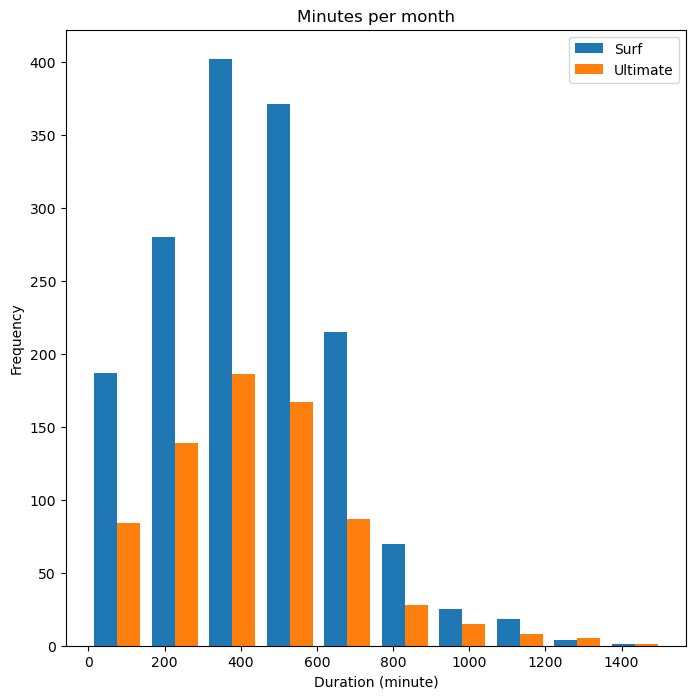

In [77]:
# Histogram size
plt.figure(figsize=(8,8))

# Histogram
plt.hist(
         [surf_user['total_min'],ultimate_user['total_min']], 
         bins=10,
         label=['Surf','Ultimate']
)

# Histogram title
plt.title("Minutes per month")

# Penamaan x,y-axis
plt.xlabel('Duration (minute)')
plt.ylabel('Frequency')

# Legend on the histogram
plt.legend()

# Displays histograms
plt.show()

As can be seen many users with surf packages make calls for 200 to 690 minutes per month with an average of 429 minutes. Meanwhile, users with the ultimate package make calls for 230 to 680 minutes per month with an average of 431 minutes.

[Back to stages](#back)

#### Analyze messages per month

In [78]:
# Variance of both users
print('Surf user variant:', np.var(surf_user['total_messages']))
print('Ultimate user variant:', np.var(ultimate_user['total_messages']))

Surf user variant: 1126.0082317266636
Ultimate user variant: 1207.0779147376504


In [79]:
# Average of both users
print('Surf user average:', surf_user['total_messages'].mean())
print('Ultimate user average:', ultimate_user['total_messages'].mean())

Surf user average: 31.15956770502225
Ultimate user average: 37.55138888888889


In [80]:
# Standard deviation of both users
print('Surf user standard deviation:', surf_user['total_messages'].std())
print('Ultimate user standard deviation:', ultimate_user['total_messages'].std())

Surf user standard deviation: 33.566717473569085
Ultimate user standard deviation: 34.767179114045675


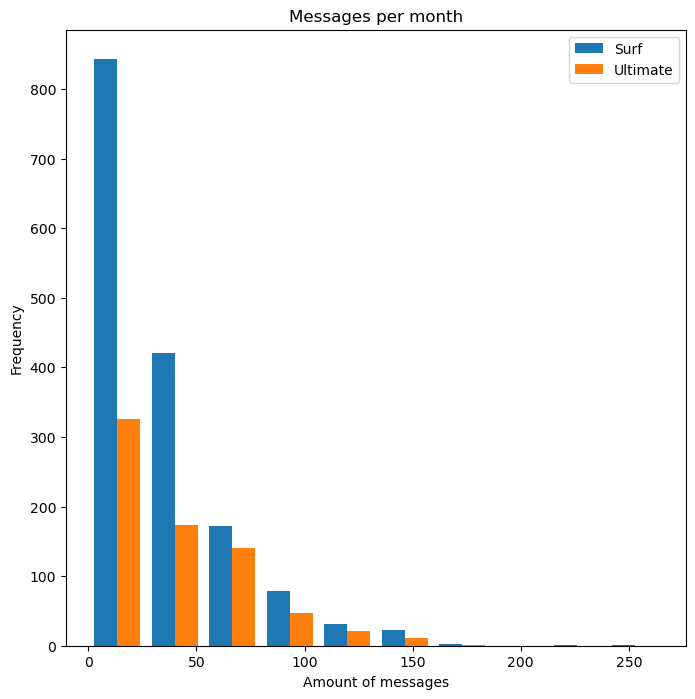

In [81]:
# Histogram size
plt.figure(figsize=(8,8))

# Histogram
plt.hist(
         [surf_user['total_messages'],ultimate_user['total_messages']], 
         bins=10,
         label=['Surf','Ultimate']
)

# Histogram title
plt.title("Messages per month")

# Penamaan x,y-axis
plt.xlabel('Amount of messages')
plt.ylabel('Frequency')

# Legend on the histogram
plt.legend()

# Displays histograms
plt.show()

As can be seen, many users with the surf package do 0 to 50 sms per month with an average of 32 sms. While users with the ultimate package send sms as much as 0 to approximately 80 sms per month with an average of 38 sms.

[Back to stages](#back)

#### Analysis of data volume per month

In [82]:
# Variance of both users
print('Surf user variant:', np.var(surf_user['total_gb']))
print('Ultimate user variant:', np.var(ultimate_user['total_gb']))

Surf user variant: 61.544449424470294
Ultimate user variant: 58.748840663580154


In [83]:
# Average of both users
print('Surf user average:', surf_user['total_gb'].mean())
print('Ultimate user average :', ultimate_user['total_gb'].mean())

Surf user average: 16.670692943420217
Ultimate user average : 17.306944444444444


In [84]:
# Standard deviation of both users
print('Surf user standard deviation:', surf_user['total_gb'].std())
print('Ultimate user standard deviation:', ultimate_user['total_gb'].std())

Surf user standard deviation: 7.8475218915011755
Ultimate user standard deviation: 7.670107545560864


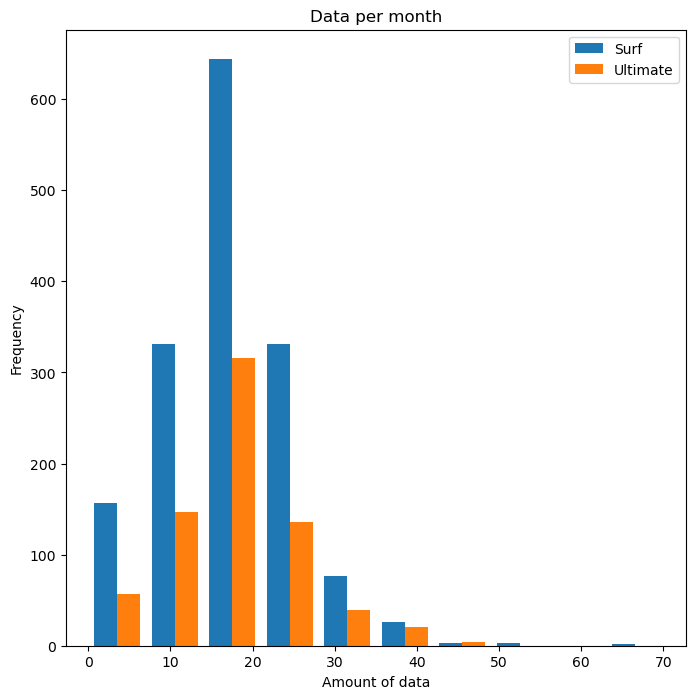

In [85]:
# Histogram size
plt.figure(figsize=(8,8))

# Histogram
plt.hist(
         [surf_user['total_gb'],ultimate_user['total_gb']], 
         bins=10,
         label=['Surf','Ultimate']
)

# Histogram title
plt.title("Data per month")

# Penamaan x,y-axis
plt.xlabel('Amount of data')
plt.ylabel('Frequency')

# Legend on the histogram
plt.legend()

# Displays histograms
plt.show()

As you can see a lot of users on the surf package spend from 7 to 28 gb of data per month with an average of 17 gb. Whereas users with the ultimate package spend as much as 9 to 23 GB of data per month with an average of 18 GB.

[Back to stages](#back)

## Hypothesis Test<a id="Test"></a>

The hypothesis test this time will use a t-test where the sample is to test the difference between the two variables.

there are several types of T-test, such as *one sample t-test, independent sample t-test, and paired sample t-test*, and for now the one that will be used is *Independent sample t-test* because the samples to be tested have differences.

The T-test itself has a value *p-value* or the probability of occurrence of the value and also *alpha* or the error limit used.

So, if the p-value is less than alpha, then we can conclude that the evidence is strong enough to reject the null hypothesis (H0) and accept the alternative hypothesis (H1). Meanwhile, if the p-value is greater than alpha, then we fail to reject the null hypothesis (H0) and cannot draw any conclusions about the alternative hypothesis (H1).

### Average revenue of 'Surf' and 'Ultimate' phone plan users <a id="h1"></a>

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0 : The average income of Ultimate and Surf phone package users is the same.
2. H1 : The average income of Ultimate and Surf phone package users is different.

If H0 defines the average income of users of Ultimate and Surf telephone packages as 'same', then H1 will define the opposite of H0, namely the average income of users of 'different' telephone packages of Ultimate and Surf.

In [86]:
# Variance of users of the 'surf' package
np.var(surf_user['monthly_profit'])

3065.8848438690225

In [87]:
# Variance of 'ultimate' package users
np.var(ultimate_user['monthly_profit'])

129.66814043209837

In [88]:
# Alpha is set at 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(ultimate_user['monthly_profit'], surf_user['monthly_profit'], equal_var=False)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis') 
else:
    print('We cannot ignore the null hypothesis') 

p-value: 3.1703905481135734e-15
We reject the null hypothesis


As explained above, because *p-value* is smaller than *alpha* the null hypothesis is rejected, which means that the average income of Ultimate and Surf phone package users is statistically different.

#### Prepaid plans that bring in more revenue

After knowing that there are differences of opinion between the two packages, then we will determine which package brings higher income.

In [89]:
# Grouping by package type
mean_plan = df_clean.groupby(['plan_name']).agg({
    'monthly_profit':'mean'
}).reset_index()

# Rename column
mean_plan = mean_plan.rename(columns={
    'monthly_profit':'profit_mean'
})

# View the results
mean_plan

,plan_name,profit_mean
0,surf,60.706408
1,ultimate,72.313889


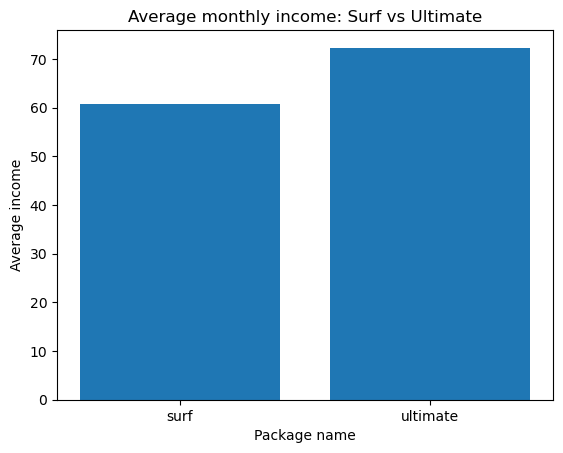

In [90]:
# Bar chart of both packages
plt.bar(mean_plan.plan_name, mean_plan.profit_mean)

# Title bar chart
plt.title('Average monthly income: Surf vs Ultimate')

# The name on the x,y-axis
plt.xlabel('Package name')
plt.ylabel('Average income')

# Displays the result
plt.show()

In [91]:
# Grouping by package type
sum_plan = df_clean.groupby(['plan_name']).agg({
    'monthly_profit':'sum'
}).reset_index()

# Rename column
sum_plan = sum_plan.rename(columns={
    'monthly_profit':'profit_total'
})

# View the results
sum_plan

,plan_name,profit_total
0,surf,95491.18
1,ultimate,52066.00


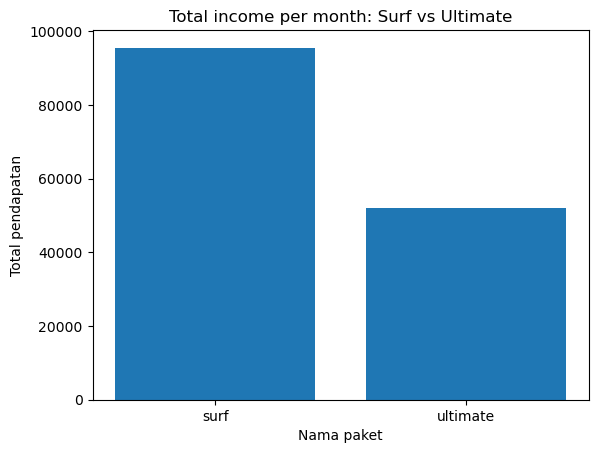

In [92]:
# Bar chart of both packages
plt.bar(sum_plan.plan_name, sum_plan.profit_total)

# Title bar chart
plt.title('Total income per month: Surf vs Ultimate')

# The name on the x,y-axis
plt.xlabel('Nama paket')
plt.ylabel('Total pendapatan')

# Displays the result
plt.show()

*Findings*:
1. Rata-rata sekitar 72 USD dihabiskan pengguna yang menggunakan paket ultimate sedangkan rata-rata sekitar 61 USD untuk pengguna paket ultimate.
2. Total pendapatan sekitar 95491 USD didapatkan dari pengguna surf, sedangkan sebanyak 52066 USD dari pengguna ultimate

*Insights*:
1. Seperti yang dilihat, rata-rata pendapatan pengguna paket ultimate lebih tinggi dibandingkan pengguna paket surf.
2. Namun jika dilihat dari total pendapatan, pengguna dengan paket surf menghasilkan pendapatan yang lebih banyak dibandingkan pengguna ultimate.

*Findings*:
1. On average around 72 USD is spent by users who use the ultimate package while the average is around 61 USD for users of the ultimate package.
2. Total revenue about 95491 USD is obtained from surf users, while as much as 52066 USD is from ultimate users

*Insights*:
1. As seen, the average income of ultimate package users is higher than that of surf package users.
2. However, when viewed from total revenue, users with surf packages generate more income than ultimate users.

[Back to stages](#back)

### Average revenue from users in NY-NJ area and other areas <a id="h2"></a>

As with the hypothesis test above, before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0 : The average income of users in the NY-NJ area is the same as the income of users from other regions.
2. H1 : The average income of users in the NY-NJ area is different from the income of users from other regions.

If H0 defines the average income of users in the NY-NJ area 'same' as the income of users from other regions, then H1 will define the opposite of H0 which is the average income of users in the NY-NJ area is 'different' from the income of users from another region.

In [93]:
# Separates NY-NJ from the rest
# NY-NJ
ny_nj = df_clean.loc[df_clean['is_ny_nj']==True]

In [94]:
# Places other than NY-NJ
other_places = df_clean.loc[df_clean['is_ny_nj']==False]

In [95]:
# Variance in the NY-NJ region
np.var(ny_nj['monthly_profit'])

1890.5177172681151

In [96]:
# Variances in other regions
np.var(other_places['monthly_profit'])

2223.886695816218

In [97]:
# Alpha is set at 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(ny_nj['monthly_profit'], other_places['monthly_profit'], equal_var=False)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:

    print('We reject the null hypothesis') 
else:

    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 0.033525615885300314
We reject the null hypothesis


As explained above, because the value of *p-value* is smaller than *alpha* the null hypothesis is rejected, which means that the average income of users in the NY-NJ area is different from the income of users from the region other.

In [98]:
# Grouping by package type
ny_nj_mean = df_clean.groupby('is_ny_nj').agg({
    'monthly_profit':'mean'
}).reset_index()

# Rename column
ny_nj_mean = ny_nj_mean.rename(columns={
    'monthly_profit':'profit_mean'
})

# Change the values true, false
ny_nj_mean['is_ny_nj'][1] = 'NY-NJ'
ny_nj_mean['is_ny_nj'][0] = 'Other'

# View the results
ny_nj_mean

,is_ny_nj,profit_mean
0,Other,65.222771
1,NY-NJ,59.921353


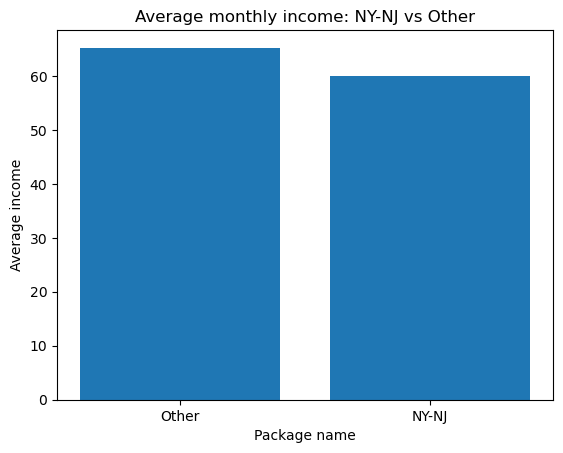

In [99]:
# Bar chart of both packages
plt.bar(ny_nj_mean.is_ny_nj, ny_nj_mean.profit_mean)

# Title bar chart
plt.title('Average monthly income: NY-NJ vs Other')

# The name on the x,y-axis
plt.xlabel('Package name')
plt.ylabel('Average income')

# Displays the result
plt.show()

*Findings*:
1. On average around 60 USD a user spends in NY-NJ while the average is about 65 USD for users elsewhere.

*Insights*:
1. As you can see, the average income of plan users elsewhere is higher than plan users in NY-NJ.

[Back to stages](#back)

## General Conclusion <a id="Conclusion"></a>

After checking the data, making some improvements and adding the required columns the new dataset can be analyzed, the following are the results of the analysis:
1. Users with surf packages make calls for 200 to 690 minutes per month with an average of 429 minutes. Meanwhile, users with the ultimate package make calls for 230 to 680 minutes per month with an average of 431 minutes.
2. Users with surf packages send 0 to 50 sms per month with an average of 32 sms. While users with the ultimate package send sms as much as 0 to approximately 80 sms per month with an average of 38 sms.
3. Users with surf packages spend 7 to 28 gb of data per month with an average of 17 gb. Whereas users with the ultimate package spend as much as 9 to 23 GB of data per month with an average of 18 GB.
4. Income from surf users is different from ultimate, and from this difference after further analysis the income from users who use the surf package becomes higher income than users with the ultimate package
5. The average income of users in the NY-NJ area is different from other regions, where the results show that the average income in other places is higher than users in the NY-NJ area.

[Back to stages](#back)